# Trabajo supervisado

Maria Cristian Arboleda,
Juan Jacobo Hincapie,
Esteban Jaramillo Osorio,
 María Camila García

In [128]:
# Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('/HR_comma_sep.csv')
display(data.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [95]:
print('Información del dataset:')
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [96]:
print('Descripción del dataset:')
data.describe()

Descripción del dataset:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Esta desbalanceado porque las personas que se fueron son un solo 23% y 3 variables son binarias (work accident, left y promotion last 5 years). 

Diagrama de bigotes

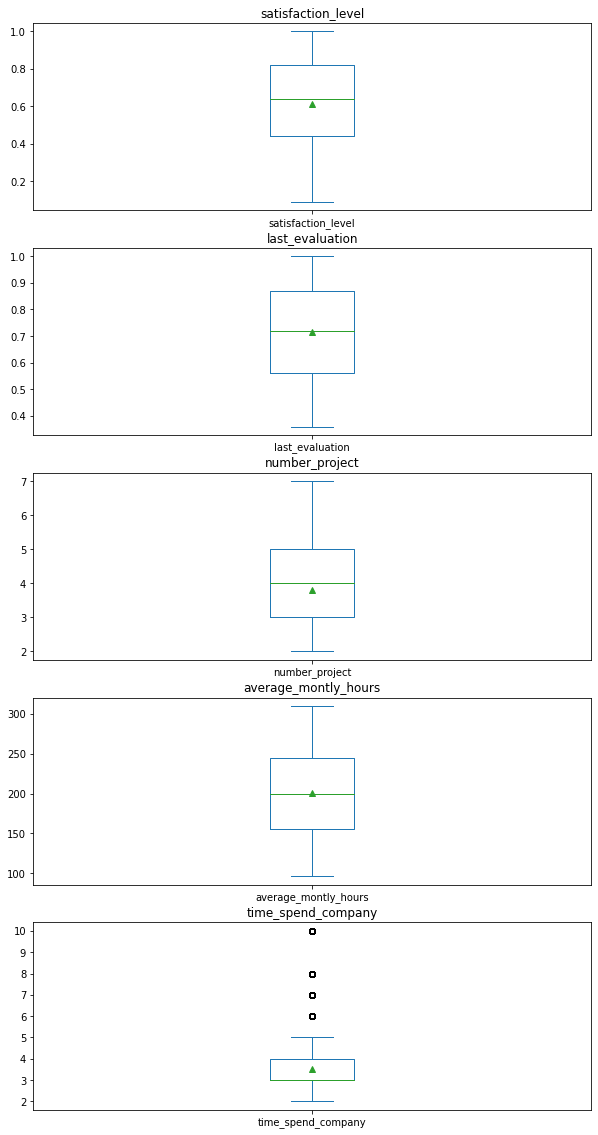

In [97]:
datos_num = data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']]

row, col = datos_num.shape
fig, axes = plt.subplots(nrows=col, ncols=1, figsize=(10,20))
j = 0

for i in datos_num:
  datos_num[i].plot(kind='box', showmeans=True, ax=axes[j], title=str(i))
  j +=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


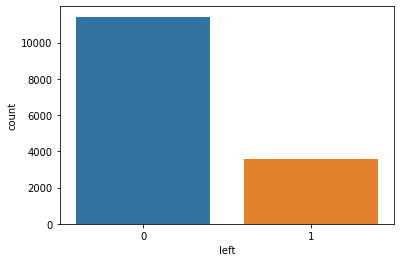

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


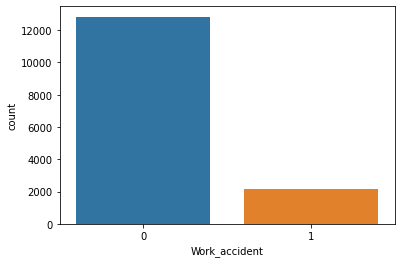

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


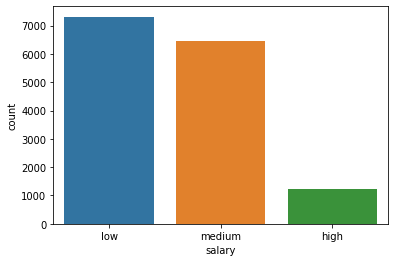

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


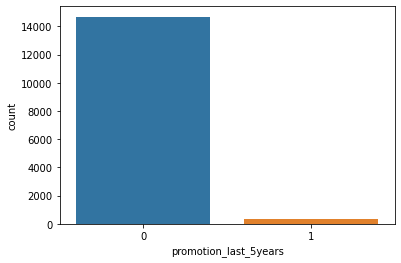

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


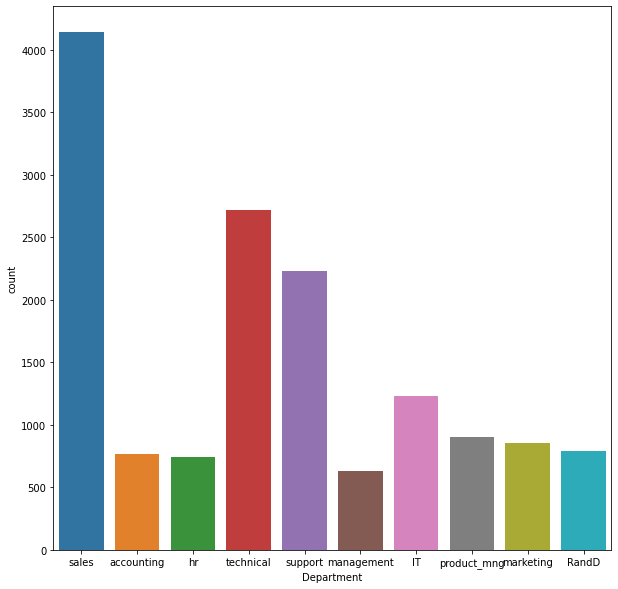

In [98]:
for i in ['left', 'Work_accident', 'salary', 'promotion_last_5years', 'Department']:

    if i == 'Department':
        plt.figure(figsize=(10,10))
        sns.countplot(data[i])
        plt.show()
    else:
        sns.countplot(data[i])
        plt.show()


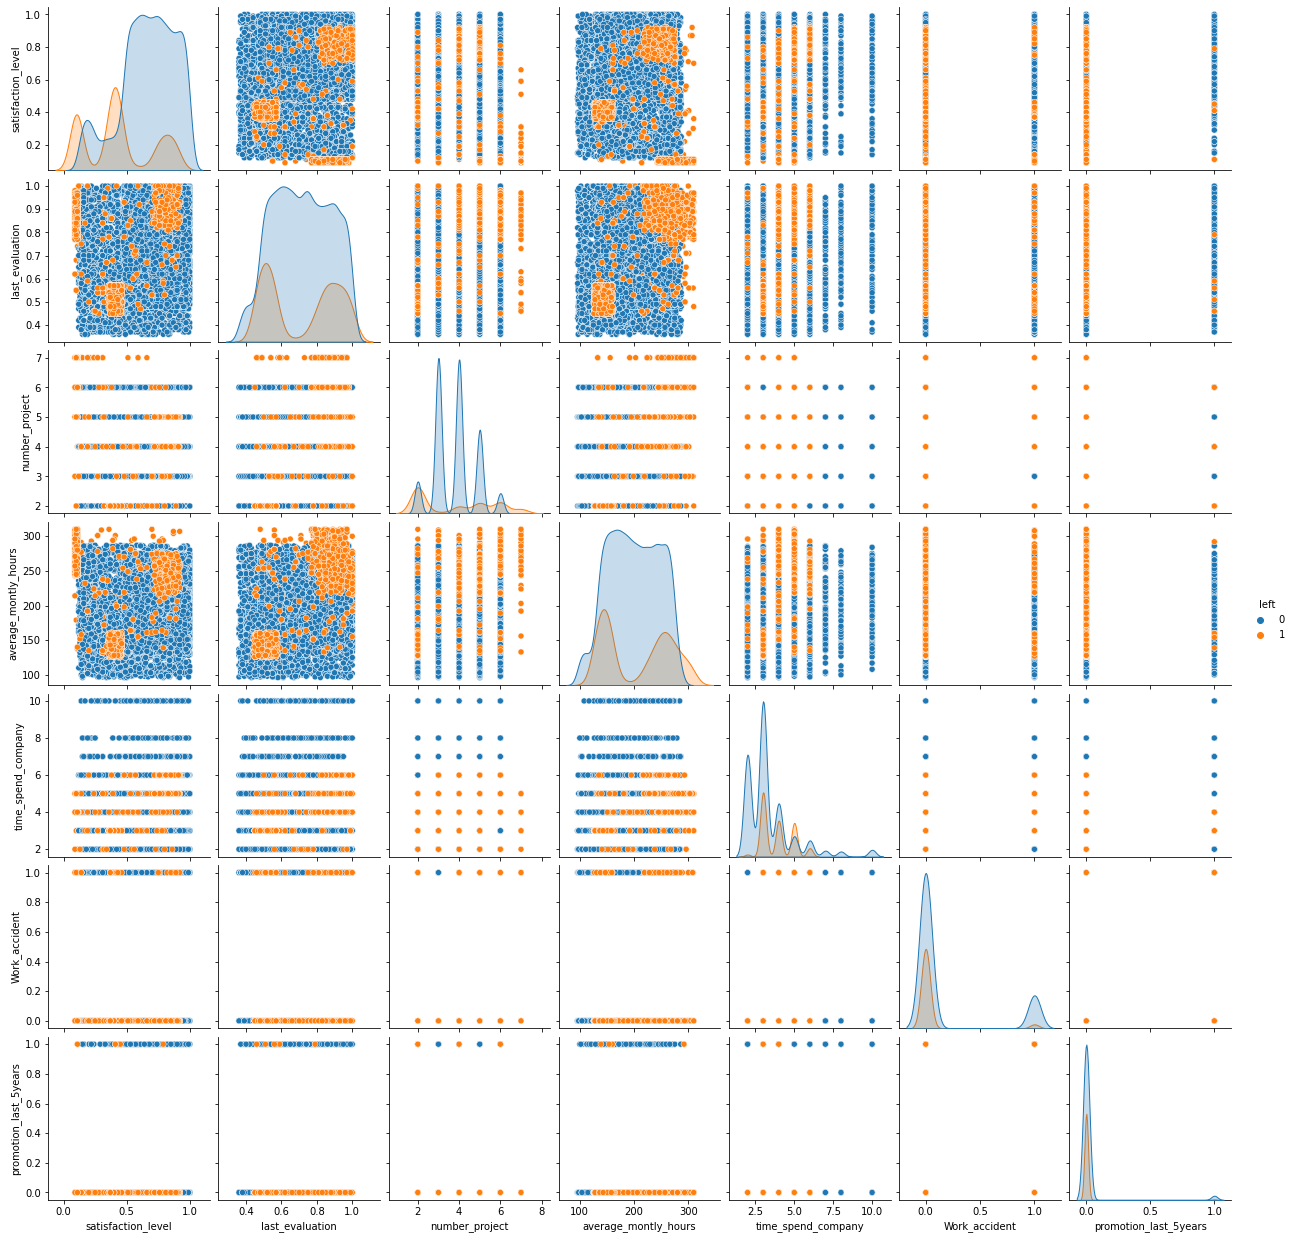

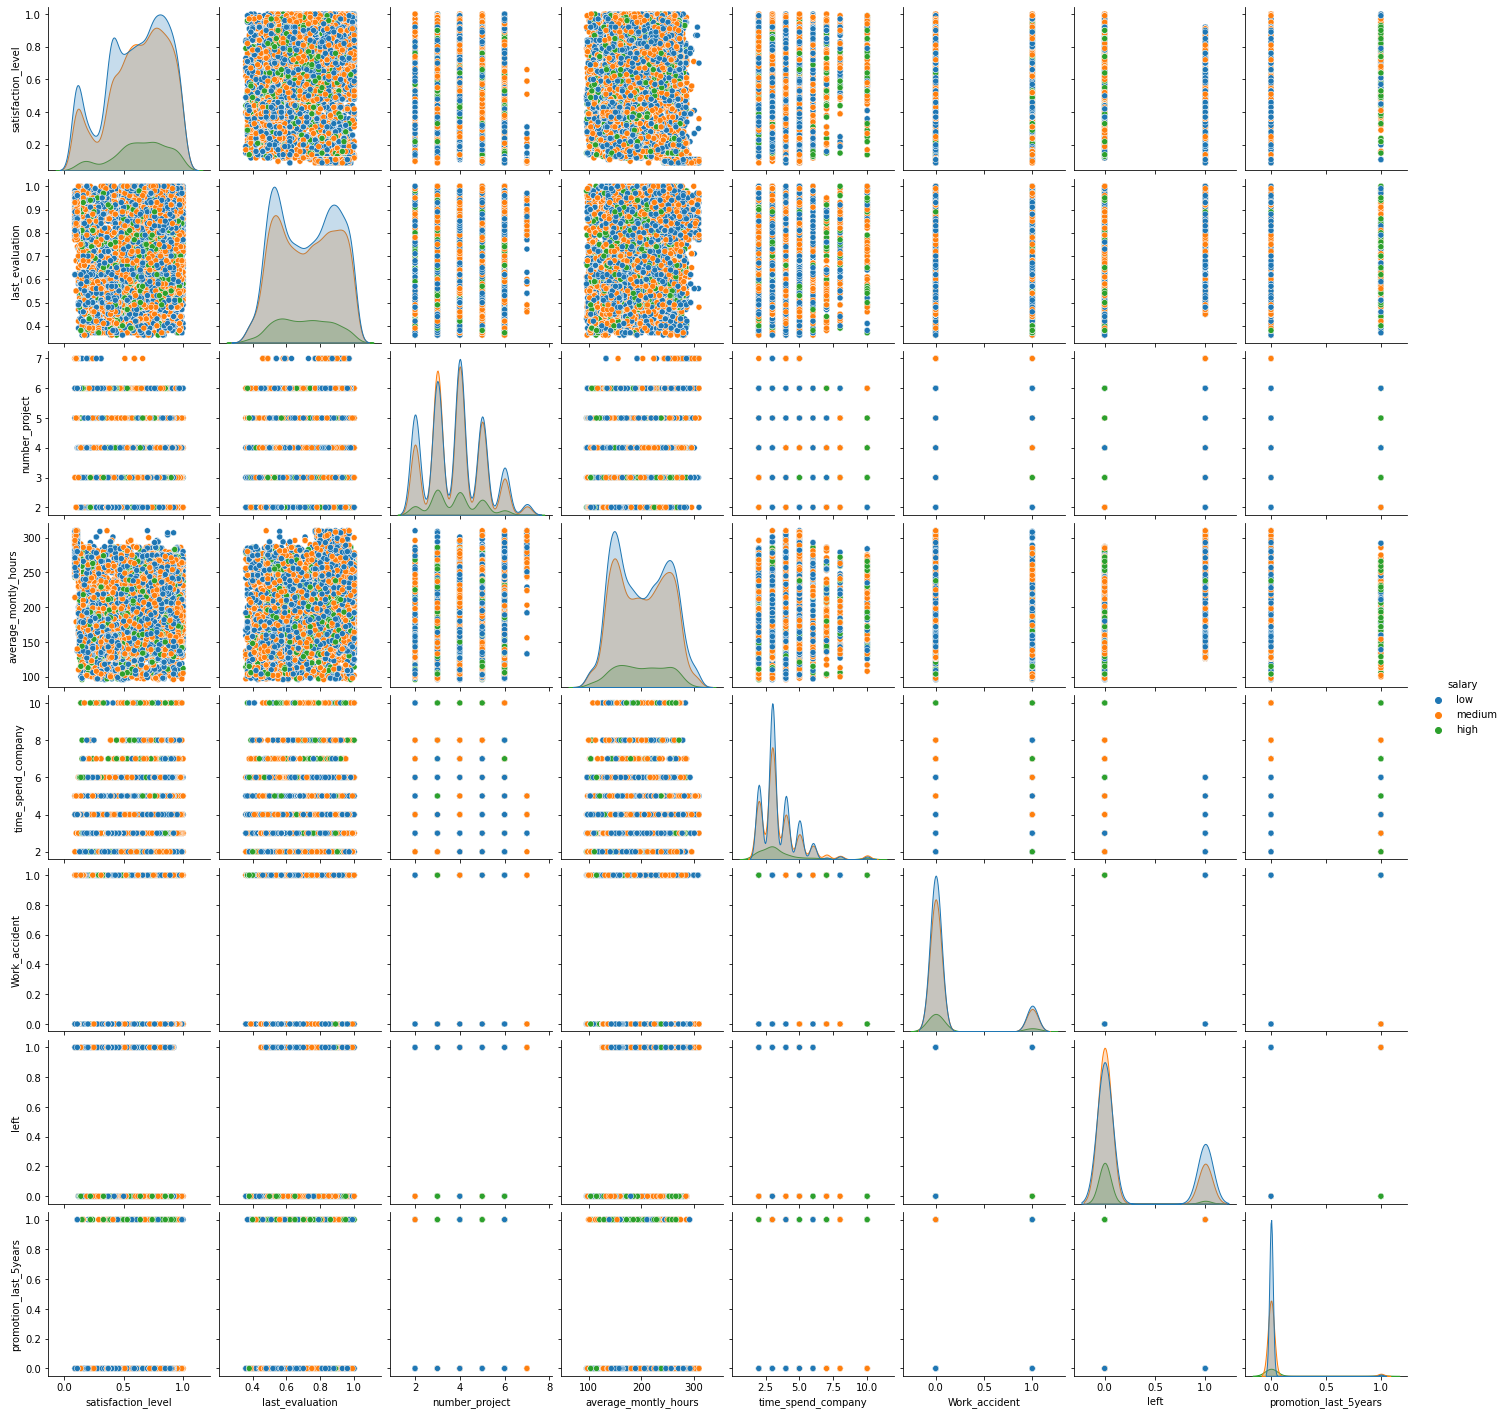

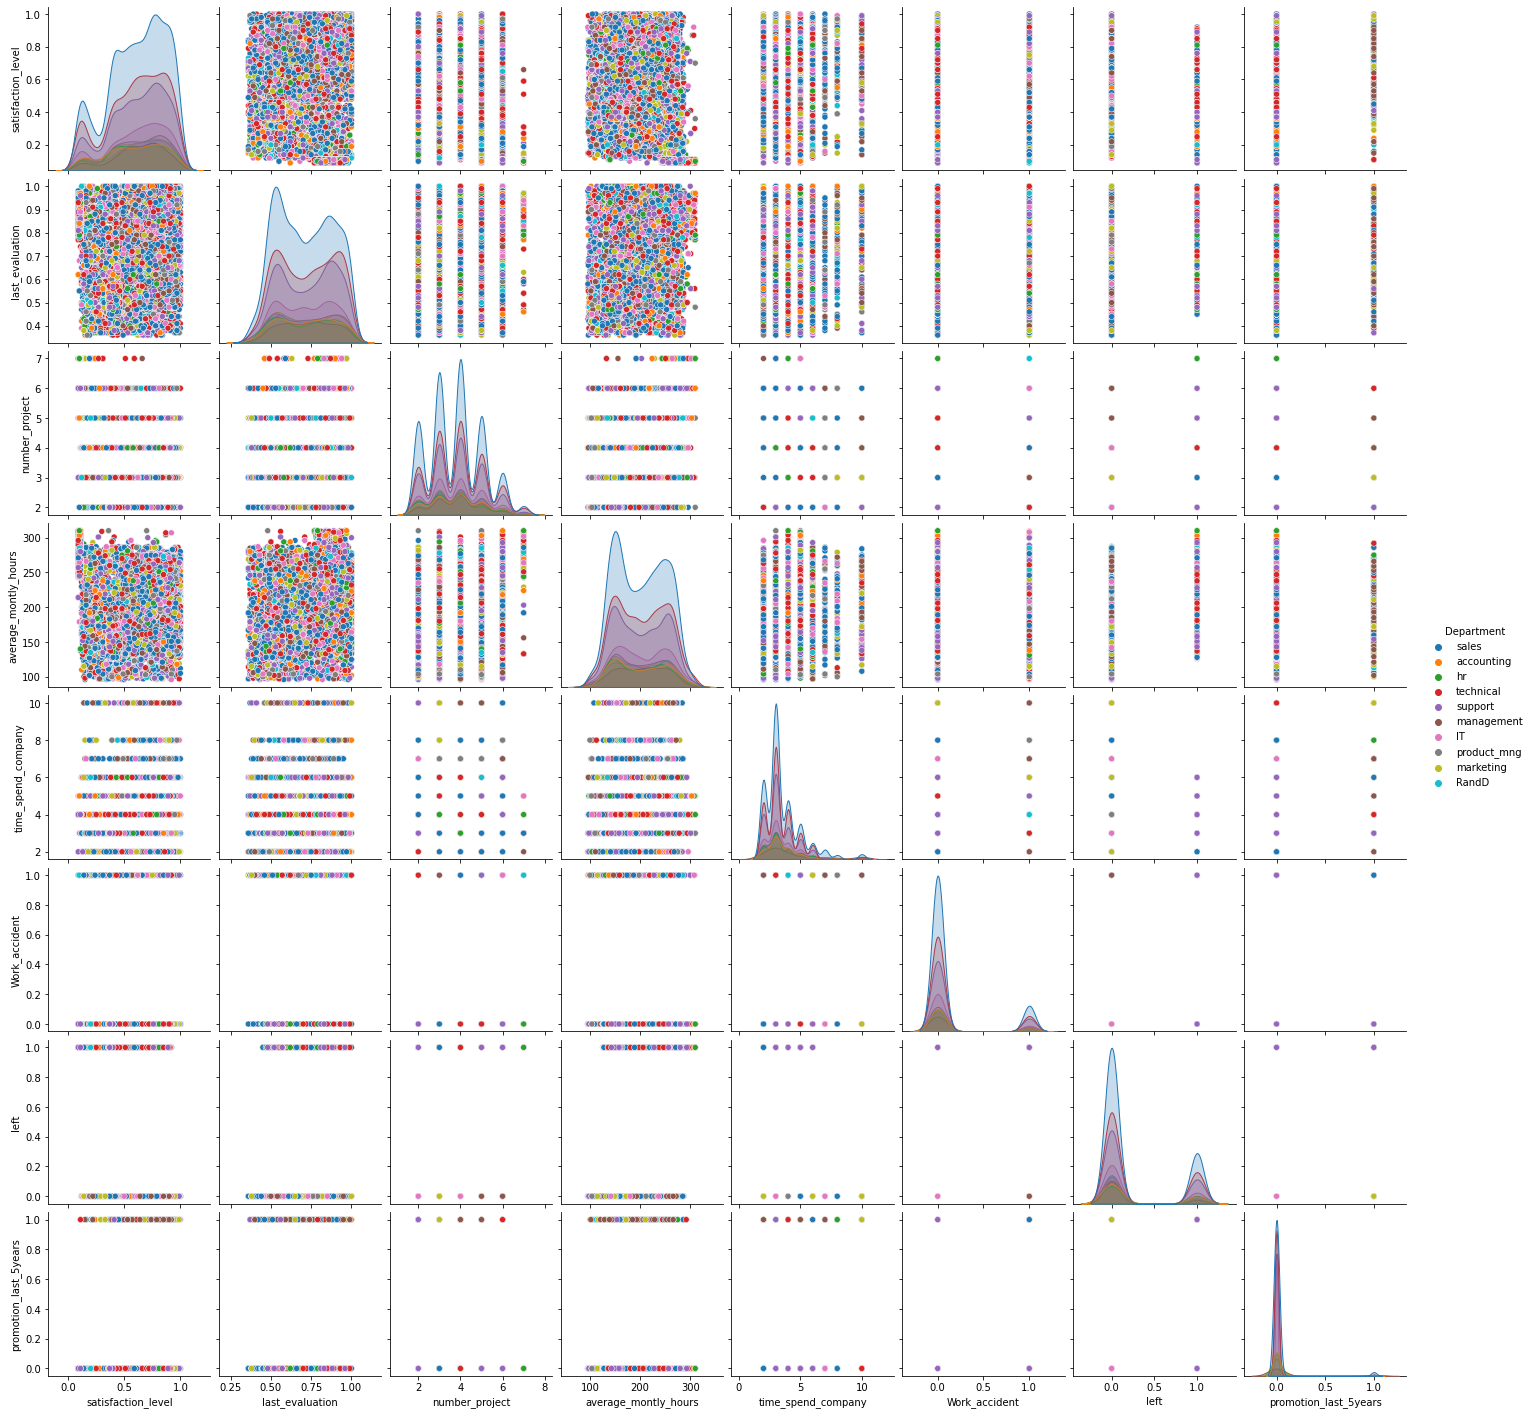

In [78]:
for i in ['left', 'salary', 'Department']:
    sns.pairplot(data, hue = i)

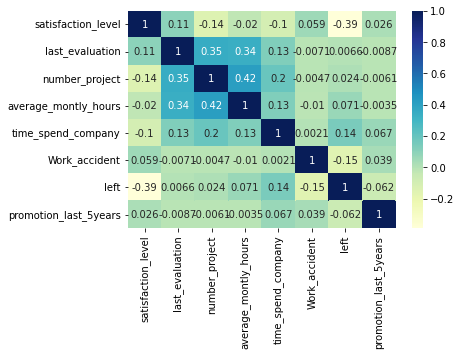

In [99]:
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

In [120]:
X= data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department', 'salary']]
y=data['left']
amh=np.array(X['average_montly_hours'])


In [121]:
amhnorm= sklearn.preprocessing.normalize([amh], norm='l2',axis=1, copy=True, return_norm=False)

In [122]:
print (amhnorm)

[[0.00618817 0.01032675 0.0107209  ... 0.00563636 0.01103622 0.00622758]]


In [123]:
X.insert(2,'amhn',amhnorm[0])

In [124]:
X.head()

,satisfaction_level,last_evaluation,amhn,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,0.006188,2,157,3,0,0,sales,low
1,0.80,0.86,0.010327,5,262,6,0,0,sales,medium
2,0.11,0.88,0.010721,7,272,4,0,0,sales,medium
3,0.72,0.87,0.008790,5,223,5,0,0,sales,low
4,0.37,0.52,0.006267,2,159,3,0,0,sales,low


In [129]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

ValueError: ignored

In [125]:
X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X,y, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]

NameError: ignored